In [1335]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

In [1336]:
def random_number(min, max):
  return random.randint(math.floor(min), math.floor(max))

In [1337]:
def create_triangle(rand_height_start, rand_height_end, rand_width_start, rand_width_end, image):
  ppt = np.array([
    [random_number(rand_width_start, rand_width_end), random_number(rand_height_start, rand_height_end)], 
    [random_number(rand_width_start, rand_width_end), random_number(rand_height_start, rand_height_end)], 
    [random_number(rand_width_start, rand_width_end), random_number(rand_height_start, rand_height_end)], 
  ], np.int32)

  ppt = ppt.reshape((-1, 1, 2))
  cv2.fillPoly(image, [ppt], (random_number(0, 255), random_number(0, 255), random_number(0, 255)), 8)

In [1338]:
def create_rectangle(rand_height_start, rand_height_end, rand_width_start, rand_width_end, image):
  ppt = np.array([
    [random_number(rand_width_start, rand_width_end), random_number(rand_height_start, rand_height_end)], 
    [random_number(rand_width_start, rand_width_end), random_number(rand_height_start, rand_height_end)], 
    [random_number(rand_width_start, rand_width_end), random_number(rand_height_start, rand_height_end)], 
    [random_number(rand_width_start, rand_width_end), random_number(rand_height_start, rand_height_end)], 
  ], np.int32)

  ppt = ppt.reshape((-1, 1, 2))
  cv2.fillPoly(image, [ppt], (random_number(0, 255), random_number(0, 255), random_number(0, 255)), 8)

In [1339]:
def create_ellipse(height, width, image):
  cv2.ellipse(
    image,
    (random_number(0, width), random_number(0, height)),
    (random_number(0, width), random_number(0, height)),
    random_number(0, 360),
    0,
    360,
    (random_number(0, 255), random_number(0, 255), random_number(0, 255)),
    -1,
    8
  )

In [1340]:
def create_stars(height, width, image):
  points = []
  for i in range(5):
    points.append((random_number(0, width), random_number(0, height)))

  center = np.array(points).mean(axis = 0)

  for point in points:
    cv2.line(
      image,
      point,
      (math.floor(center[0]), math.floor(center[1])),
      (random_number(0, 255), random_number(0, 255), random_number(0, 255)),
      2,
      8
    )


In [1341]:
def generate_image(height, width, triangles, rectangles, ellipses, stars):
  r = np.full((height, width), random_number(0, 255))
  g = np.full((height, width), random_number(0, 255))
  b = np.full((height, width), random_number(0, 255))

  rand_height_start = height * -0.1
  rand_height_end = height * 1.1 
  rand_width_start = width * -0.1
  rand_width_end = width * 1.1 

  image = np.dstack((r, g, b))
  shapes = [triangles, rectangles, ellipses, stars]
  index = random_number(0, 3)
  print(sum(shapes))
  while sum(shapes) > 0:
    while(shapes[index] == 0):
      index = random_number(0, 3)
    
    if(index == 0):
      create_triangle(rand_height_start, rand_height_end, rand_width_start, rand_width_end, image)
    elif(index == 1):
      create_rectangle(rand_height_start, rand_height_end, rand_width_start, rand_width_end, image)
    elif(index == 2):
      create_ellipse(height, width, image)
    elif(index == 3):
      create_stars(height, width, image)

    shapes[index] -= 1

  return image

12
3


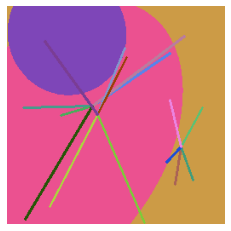

In [1342]:
height = 256
width = 256

image = generate_image(height, width, 3, 3, 3, 3)

imgplot = plt.imshow(image)
plt.axis('off')
plt.show()